  <h1 style="color:red;"> ANÁLISE EXPLORATÓRIA</h1>

### Este projeto visa satisfazer as seguintes questões:

<strong>1)</strong>Quais são as categorias de filmes mais comuns no IMDB?

<strong>2)</strong>Quais o número de títulos por gênero?

<strong>3)</strong>Qual a mediana de avaliação dos filmes por gênero?

<strong>4)</strong>Qual a mediana de avaliação dos filmes  em relação ao ano de estréia?

<strong>5)</strong>Qual o número de filmes avaliados por gênero em relação ao ano de estréia?

<strong>6)</strong>Qual o filme com maior tempo de duração,com percentis?

<strong>7)</strong>Qual a relação entre duração e gênero?

<strong>8)</strong>Qual o número de filmes produzidos por país?

<strong>9)</strong>Quais são os top 10 melhores filmes?

<strong>10)</strong>Quais são os top 10 Piores filmes?

<strong style="color: green;">IMDB</strong>,também conhecida como Internet Movie Database, é uma base de dados online de informação sobre cinema TV, música e games, hoje pertencente à Amazon.

<hr style="width: 10px;color:blue;">


In [1]:
"""
Instalações:
"""
!pip install -q imdb-sqlite #instala localmente esse pacote
# o imdb-sqlite é um banco de dados onde foi feito o download de https://www.imdb.com/interfaces/
from platform import python_version

# pacote para download dos datasets #-q dá a saída silenciosa
!pip install -q pycountry

print("A versão da Linguagem Python usada neste jupyter Notebook: ", python_version())

A versão da Linguagem Python usada neste jupyter Notebook:  3.8.8


### imports:

In [2]:
import re #regex
import time
import sqlite3 #database
import pycountry
import numpy as np # principais para manipulação de dados
import pandas as pd # principais para manipulação de dados
import matplotlib.pyplot as plt # visualização
import seaborn as sns # visualização
from matplotlib import cm
from sklearn.feature_extraction.text import CountVectorizer #machinelearning
import warnings

warnings.filterwarnings("ignore")
sns.set_theme(style = "whitegrid")



In [3]:
#!%%time #para analisar o tempo de execução, exclusivo do jupyter-notebook

!imdb-sqlite  #comando do sistema operacional que baixa o download



2021-10-07 13:45:07,307 DB already exists: (imdb.db). Refusing to modify. Exiting


In [4]:
# conexão com o banco de dados:
connex = sqlite3.connect('imdb.db')

In [5]:
# extrai a lista da tabela
tabelas = pd.read_sql_query("select name as 'Table_Name' from sqlite_master where type = 'table'", connex)

In [6]:
#tipo da tabela
type(tabelas)

pandas.core.frame.DataFrame

In [7]:
#visualiza os 5 primeiros resultados:
tabelas.head()


,Table_Name
0,people
1,titles
2,akas
3,crew
4,episodes


In [8]:
# converte o dataframe em lista
tabelas = tabelas["Table_Name"].values.tolist()

In [9]:
# percorrer a lista e extrair cada schema(detalhes da tabela)
for tabela in tabelas:
    consulta = f"PRAGMA TABLE_INFO({tabela})" # funciona como um select
    resultado = pd.read_sql_query(consulta, connex) # le a busca do banco de dados
    display(resultado) # exibe o resultado
    print("-"*100)
    print('\n')

,cid,name,type,notnull,dflt_value,pk
0,0,person_id,VARCHAR,0,None,1
1,1,name,VARCHAR,0,None,0
2,2,born,INTEGER,0,None,0
3,3,died,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------




,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,type,VARCHAR,0,None,0
2,2,primary_title,VARCHAR,0,None,0
3,3,original_title,VARCHAR,0,None,0
4,4,is_adult,INTEGER,0,None,0
5,5,premiered,INTEGER,0,None,0
6,6,ended,INTEGER,0,None,0
7,7,runtime_minutes,INTEGER,0,None,0
8,8,genres,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------




,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,title,VARCHAR,0,None,0
2,2,region,VARCHAR,0,None,0
3,3,language,VARCHAR,0,None,0
4,4,types,VARCHAR,0,None,0
5,5,attributes,VARCHAR,0,None,0
6,6,is_original_title,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------




,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,person_id,VARCHAR,0,None,0
2,2,category,VARCHAR,0,None,0
3,3,job,VARCHAR,0,None,0
4,4,characters,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------




,cid,name,type,notnull,dflt_value,pk
0,0,episode_title_id,INTEGER,0,None,0
1,1,show_title_id,INTEGER,0,None,0
2,2,season_number,INTEGER,0,None,0
3,3,eposide_number,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------




,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,rating,INTEGER,0,None,0
2,2,votes,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------




## Resolvendo as perguntas de negócio, de fato:


<h4 style="color: blue;">Questão 1:</h4>

In [10]:
# criando a consulta SQL
consulta1 = "select type, count(*) as count from titles group by type" # seleciona o tipo e a quantidade com base nos títulos e agrupa por tipo


In [11]:
# extrai o resultado
resultado1 = pd.read_sql_query(consulta1, connex)


In [12]:
# exibe o resultado
display(resultado1)

,type,count
0,movie,589917
1,radioEpisode,1
2,short,834200
3,tvEpisode,6112195
4,tvMiniSeries,40027
5,tvMovie,133194
6,tvPilot,2
7,tvSeries,216228
8,tvShort,10326
9,tvSpecial,34310


In [13]:
# percentual para cada tipo:
resultado1['percentual'] = round((resultado1['count'] / resultado1['count'].sum()) * 100, 2)

In [14]:
# exibir:
display(resultado1)

,type,count,percentual
0,movie,589917,7.09
1,radioEpisode,1,0.00
2,short,834200,10.02
3,tvEpisode,6112195,73.43
4,tvMiniSeries,40027,0.48
5,tvMovie,133194,1.60
6,tvPilot,2,0.00
7,tvSeries,216228,2.60
8,tvShort,10326,0.12
9,tvSpecial,34310,0.41


In [15]:
# criar gráfico com apenas 4 categorias (pois o cérebro humano processa bem apenas até 4 informações diferentes-isso trata-se de neurociência)
# as 3 categorias com mais título e outra com o restante
others = {}

In [16]:
#filtra o percentual em 5% e soma o total
others['count'] = resultado1[resultado1['percentual'] < 5]['count'].sum()

In [17]:
# grava o percentual
others['percentual'] = resultado1[resultado1['percentual'] < 5]['percentual'].sum()

In [18]:
# ajusta o nome
others['type'] = 'others'

In [19]:
# consolidando os valores para auxiliar o tomador de decisão
others

{'count': 787419, 'percentual': 9.45, 'type': 'others'}

In [20]:

# agora, criando os valores mais altos


In [21]:
resultado1 = resultado1[resultado1['percentual'] > 5] # filtra o dataframe


In [22]:
resultado1 = resultado1.append(others, ignore_index=True) # apend nas outras

In [23]:
#ordenando o resultado
resultado1 = resultado1.sort_values(by = 'count', ascending=False)

In [24]:
#visualização
resultado1.head()

,type,count,percentual
2,tvEpisode,6112195,73.43
1,short,834200,10.02
3,others,787419,9.45
0,movie,589917,7.09


In [25]:
# ajustando as labels
labels = [str(resultado1['type'][i]) + " - " + str(resultado1['percentual'][i]) + " %" for i in range(len(resultado1))]
labels

['movie - 7.09 %', 'short - 10.02 %', 'tvEpisode - 73.43 %', 'others - 9.45 %']

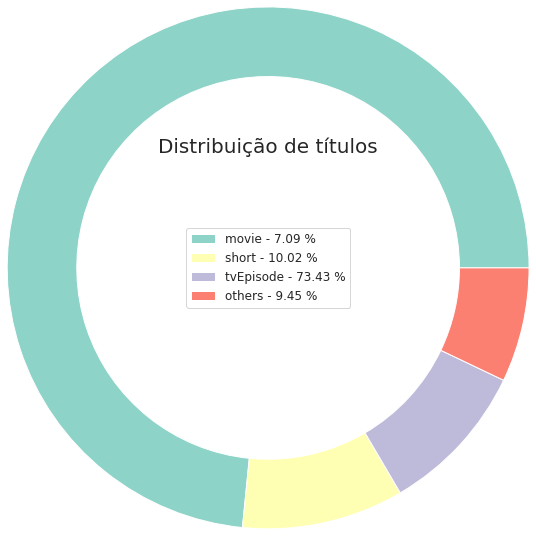

In [26]:
#PLOTAGEM:

#mapa de cores
cs = cm.Set3(np.arange(100))

#cria a figura:
f = plt.figure()

#plita
plt.pie(resultado1['count'], labeldistance = 1, radius = 3, colors = cs, wedgeprops = dict(width = 0.8))
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
plt.title("Distribuição de títulos", loc = "center", fontdict = {"fontsize":20, 'fontweight':20})
plt.show()

<h4 style="color: blue;">Questão 2:</h4>

In [27]:
# Cria a consulta SQL
consulta2 = '''SELECT genres, COUNT(*) FROM titles WHERE type = 'movie' GROUP BY genres'''

In [28]:
#resultado:
resultado2 = pd.read_sql_query(consulta2, connex)

In [29]:
# visualização
display(resultado2)


,genres,count(*)
0,Action,13468
1,"Action,Adult",11
2,"Action,Adult,Adventure",1
3,"Action,Adult,Comedy",5
4,"Action,Adult,Crime",10
...,...,...
1442,"Thriller,Western",39
1443,War,1263
1444,"War,Western",9
1445,Western,4040


In [30]:
#converte as strings para minusculo


In [31]:
resultado2['genres'] = resultado2['genres'].str.lower().values

In [32]:
resultado2

,genres,count(*)
0,action,13468
1,"action,adult",11
2,"action,adult,adventure",1
3,"action,adult,comedy",5
4,"action,adult,crime",10
...,...,...
1442,"thriller,western",39
1443,war,1263
1444,"war,western",9
1445,western,4040


In [39]:
# remove valor NA  (ausentes)
temp = resultado2['genres'].dropna()


In [34]:
temp = resultado2.drop(1446) # remove o \n
print(temp)

                      genres  count(*)
0                     action     13468
1               action,adult        11
2     action,adult,adventure         1
3        action,adult,comedy         5
4         action,adult,crime        10
...                      ...       ...
1441    thriller,war,western         3
1442        thriller,western        39
1443                     war      1263
1444             war,western         9
1445                 western      4040

[1446 rows x 2 columns]


<p style="color: green;">Agora, usar o countvectorizer para converter a coluna de generos em um vetor one-hot encoded para contar o número de filmes em cada gênero.</p>

In [40]:
# crio um vetor com expressões regulares para filtrar as strings
padrao = '(?u)\\b[\\w-]+\\b' #há algum u na frente? \b = processa simbolo de 'espaço' \x08 \w + = 1 ou mais ocorrências
vetor = CountVectorizer(token_pattern = padrao, analyzer = 'word').fit(temp)
type(vetor)


sklearn.feature_extraction.text.CountVectorizer

In [48]:
# aplica a vetorização do dataset :
bag_generos = vetor.transform(temp)
type(bag_generos)

# retorna gêneros únicos:
generos_unicos =  vetor.get_feature_names()


['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'n',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [51]:
# cria dataframe de generos
generos = pd.DataFrame(bag_generos.todense(), columns = generos_unicos, index = temp.index)


In [50]:
# visualiza
generos.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1447 entries, 0 to 1446
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   action       1447 non-null   int64
 1   adult        1447 non-null   int64
 2   adventure    1447 non-null   int64
 3   animation    1447 non-null   int64
 4   biography    1447 non-null   int64
 5   comedy       1447 non-null   int64
 6   crime        1447 non-null   int64
 7   documentary  1447 non-null   int64
 8   drama        1447 non-null   int64
 9   family       1447 non-null   int64
 10  fantasy      1447 non-null   int64
 11  film-noir    1447 non-null   int64
 12  game-show    1447 non-null   int64
 13  history      1447 non-null   int64
 14  horror       1447 non-null   int64
 15  music        1447 non-null   int64
 16  musical      1447 non-null   int64
 17  mystery      1447 non-null   int64
 18  n            1447 non-null   int64
 19  news         1447 non-null   int64
 20  reality-

In [52]:
# apaga a coluna n
generos = generos.drop(columns = 'n', axis = 0)


,action,adult,adventure,animation,biography,comedy,crime,documentary,drama,family,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
# Calcula o percentual
generos_percentual = round(100 * pd.Series(generos.sum()).sort_values(ascending = False) / generos.shape[0], 2)

In [55]:
# Visualiza
generos_percentual.head(10)


drama          18.382861
comedy         16.862474
documentary    15.964064
adventure      14.858328
action         14.651002
romance        13.476158
crime          13.061507
mystery        12.577747
thriller       12.370422
fantasy        12.301313
dtype: float64

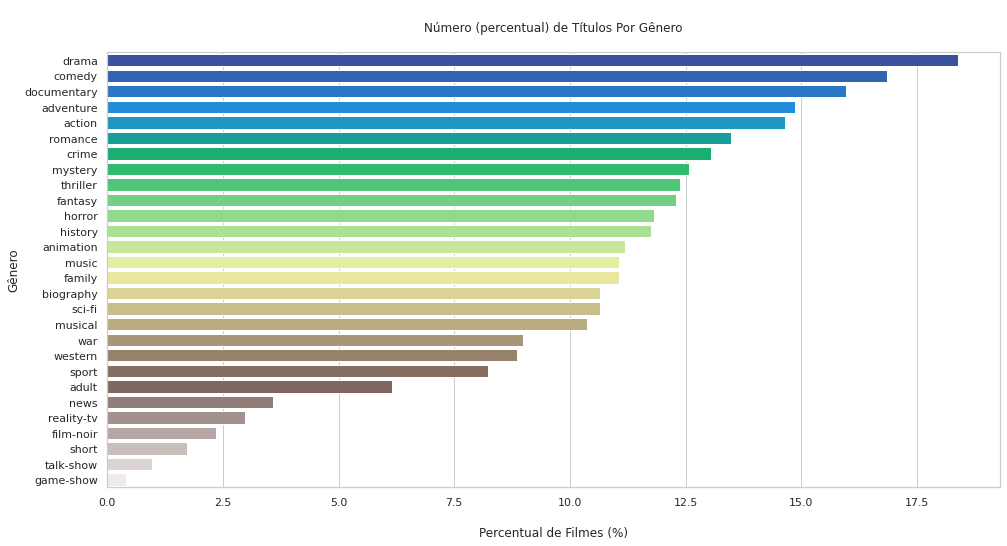

In [58]:
# plotar o gráfico:
plt.figure(figsize = (16, 8))
sns.barplot(x = generos_percentual.values, y = generos_percentual.index, orient = "h", palette = "terrain")
plt.ylabel('Gênero')
plt.xlabel("\nPercentual de Filmes (%)")
plt.title("\nNúmero (percentual) de Títulos Por Gênero\n")
plt.show()

## Questão 3


In [78]:
 # encontrar a mediana (a mediana é escolhida, pois não contém outliers, ao contrário da média, que é afetada por extremos...)
    # consulta sql:
consulta3 = '''
            select rating, genres from ratings join titles on ratings.title_id = titles.title_id
            where premiered <= 2022 and type = 'movie'    
            ''' # join é o método de juncao das tabelas, pois está buscando dados de 2 tabelas
# resultado 
resultado3 = pd.read_sql_query(consulta3, connex)
display(resultado3)


,rating,genres
0,4.5,\N
1,6.1,"Action,Adventure,Biography"
2,5.2,Drama
3,4.5,Drama
4,3.8,Drama
...,...,...
269326,3.5,"Action,Adventure,Thriller"
269327,5.8,Thriller
269328,6.4,"Drama,History"
269329,3.8,"Adventure,History,War"


In [85]:
# função que retorna gêneros:
def retorna_generos(df):
    df['genres'] = df['genres'].str.lower().values
    temp = df['genres'].dropna()
    vetor = CountVectorizer(token_pattern = '(?u)\\b[\\w-]+\\b', analyzer = 'word').fit(temp)
    generos_unicos =  vetor.get_feature_names()
    generos_unicos = [genre for genre in generos_unicos if len(genre) > 1]
    return generos_unicos


generos_unicos = retorna_generos(resultado3)

['action', 'adult', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'film-noir', 'game-show', 'history', 'horror', 'music', 'musical', 'mystery', 'news', 'reality-tv', 'romance', 'sci-fi', 'short', 'sport', 'talk-show', 'thriller', 'war', 'western']


In [ ]:
genero_counts = []
genero_ratings = []

In [ ]:
for itens in generos_unicos:
    # retorna contagem de filmes por gênero
    consulta = 'select count(rating) from ratings join titles on ratings.title_id=titles.titles_id where genres like'